# Trabajo práctico: Predicción de precios de casas

Alumnos: Noir Nicolas, González Ignacio

Año: 2024

Materia: Aprendizaje automático 1

Carrera: TUIA

## Descripcion de variables

Características de entrada en orden:

1) CRIM: tasa de criminalidad per cápita por ciudad
2) ZN: proporción de terrenos residenciales zonificados para lotes de más de 25,000 pies cuadrados
3) INDUS: proporción de acres de negocios no minoristas por ciudad
4) CHAS: variable dummy del río Charles (1 si el tramo limita con el río; 0 de lo contrario)
5) NOX: concentración de óxidos de nitrógeno (partes por 10 millones) [parts/10M]
6) RM: número promedio de habitaciones por vivienda
7) AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940
8) DIS: distancias ponderadas a cinco centros de empleo de Boston
9) RAD: índice de accesibilidad a las autopistas radiales
10) TAX: tasa de impuesto sobre la propiedad a valor completo por $10,000 [$/10k]
11) PTRATIO: proporción alumno-maestro por ciudad
12) B: El resultado de la ecuación B=1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
13) LSTAT: % de población de menor estatus socioeconómico

Variable de salida (target):

14) MEDV: Valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares [k$]


## Preprocesamiento de los datos

In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install nbformat

In [75]:
import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [5]:
dataset_completo = pd.read_csv("https://github.com/nacho-gonz/AA1-TUIA-Noir-Gonzalez/raw/master/house-prices-tp.csv")
X_train, X_test, y_train, y_test = train_test_split(dataset_completo.drop('MEDV', axis=1), dataset_completo['MEDV'].values.reshape(-1,1), test_size=0.2,random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((444, 13), (112, 13), (444, 1), (112, 1))

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 208 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     425 non-null    float64
 1   ZN       426 non-null    float64
 2   INDUS    432 non-null    float64
 3   CHAS     424 non-null    float64
 4   NOX      423 non-null    float64
 5   RM       427 non-null    float64
 6   AGE      422 non-null    float64
 7   DIS      430 non-null    float64
 8   RAD      418 non-null    float64
 9   TAX      431 non-null    float64
 10  PTRATIO  422 non-null    float64
 11  B        426 non-null    float64
 12  LSTAT    426 non-null    float64
dtypes: float64(13)
memory usage: 48.6 KB


In [8]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
208,0.04590,52.5,5.32,0.0,0.405,6.315,45.6,7.3172,6.0,293.0,16.6,396.90,7.60
89,0.26169,0.0,9.90,0.0,0.544,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72
297,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.22
301,0.05561,70.0,2.24,0.0,0.400,7.041,10.0,7.8278,5.0,358.0,14.8,371.58,4.74
218,2.15505,0.0,19.58,0.0,0.871,5.628,100.0,1.5166,5.0,403.0,14.7,169.27,16.65


Elijo imputar los valores con KNN, ya que estima de una manera más real el valor que podrían tener esos registros. En el caso de 'CHAS' creo que aunque esta manera de imputar me de valores que no son 0 o 1, al redondear va a seguir siendo más certero que cualquier metodo de imputación de valores.

In [59]:
knn_imputer = KNNImputer(n_neighbors=5)
X_train_imputado = knn_imputer.fit_transform(X_train)
X_train_imputado_df = pd.DataFrame(X_train_imputado, columns=X_train.columns)
X_train_imputado_df['RAD'] = X_train_imputado_df['RAD'].round().astype('int')
X_train_imputado_df['CHAS'] = X_train_imputado_df['CHAS'].round().astype('category')
X_train_imputado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     444 non-null    float64 
 1   ZN       444 non-null    float64 
 2   INDUS    444 non-null    float64 
 3   CHAS     444 non-null    category
 4   NOX      444 non-null    float64 
 5   RM       444 non-null    float64 
 6   AGE      444 non-null    float64 
 7   DIS      444 non-null    float64 
 8   RAD      444 non-null    int64   
 9   TAX      444 non-null    float64 
 10  PTRATIO  444 non-null    float64 
 11  B        444 non-null    float64 
 12  LSTAT    444 non-null    float64 
dtypes: category(1), float64(11), int64(1)
memory usage: 42.3 KB


## Visualización de los datos

In [38]:
fig = px.box(X_train_imputado_df, y="RM", points='all',
            title='Distribución de la cantidad de habitaciones promedio por vivienda en una ciudad')
fig.show()  

In [34]:
fig = px.scatter(x=X_train_imputado_df['LSTAT'], y=X_train_imputado_df['CRIM'], 
                title='Tasa de criminalidad por % de población de menor estatus socioeconómico'
                , labels={'x':'Porcentaje de población de menor estatus socioeconómico',
                            'y':'Tasa de criminalidad per cápita por ciudad'})
fig.show()


In [53]:
fig = px.scatter(x=X_train_imputado_df['NOX'], y=X_train_imputado_df['INDUS'], 
                title='Concentración de óxidos de nitrógeno por proporción de acres de negrocios no minoristas'
                , labels={'x':'Concentración de óxidos de nitrógeno/10M',
                            'y':'Proporción de acres de negocios no minoristas por ciudad',
                            'color':'CHAS'},
                            color=X_train_imputado_df['CHAS'])
fig.show()

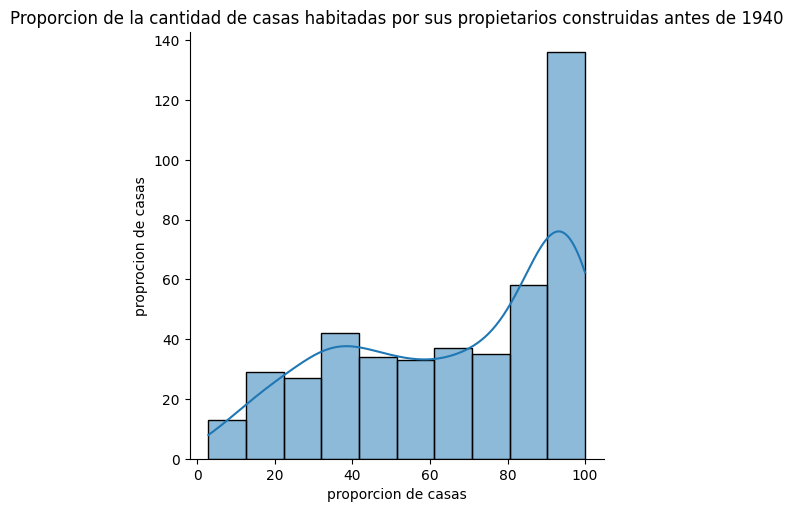

In [60]:
sns.displot(X_train_imputado_df['AGE'], kde=True, rug=False)
plt.title('Proporcion de la cantidad de casas habitadas por sus propietarios construidas antes de 1940')
plt.ylabel('proprocion de casas')
plt.xlabel('proporcion de casas')
plt.show()

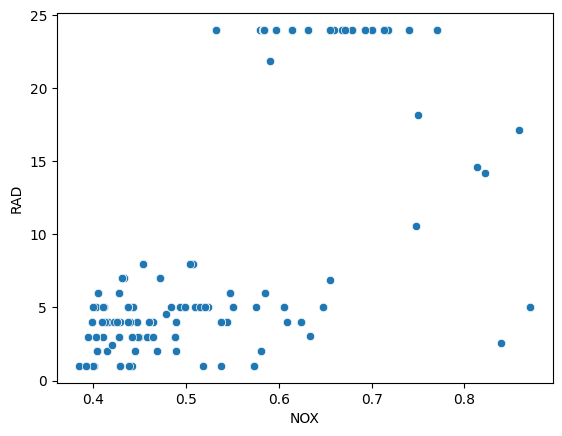

In [43]:
#sns.scatterplot(X_train, x='NOX', y='RAD')

plt.show()

In [71]:
import plotly.figure_factory as ff

hist_data = [X_train_imputado_df['AGE'].tolist()]
group_labels = ['displot']
fig = ff.create_distplot(hist_data, group_labels, bin_size=10)

fig.show()

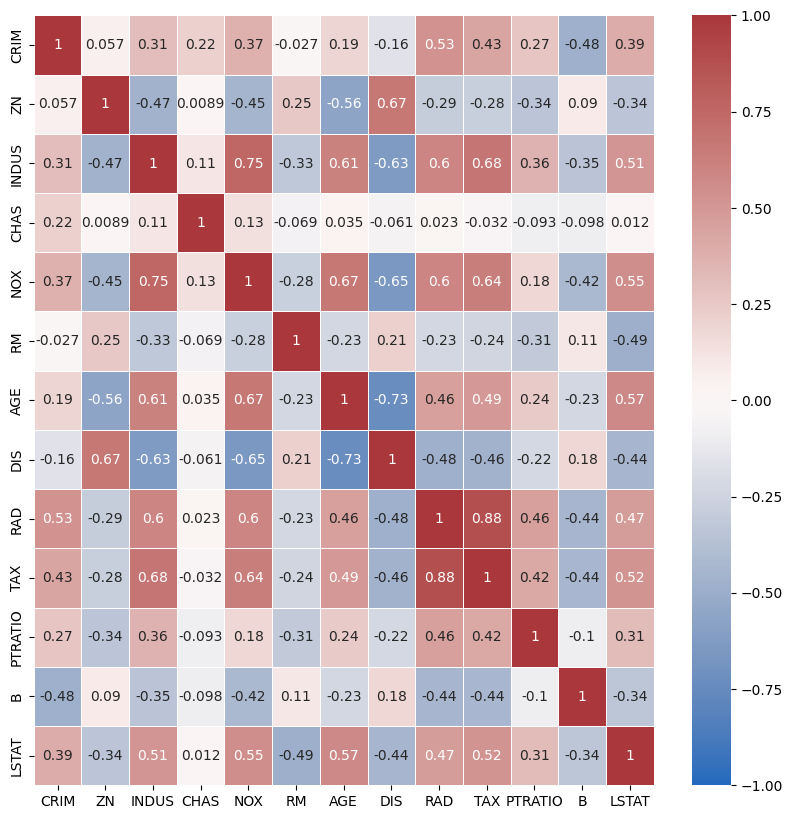

In [64]:
df_numeric = X_train[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
corrmat = df_numeric.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=1,vmin=-1, annot=True, linewidths=.5, ax=ax, cmap='vlag')
plt.show()

In [73]:
X_train_imputado_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,6.799924,15.590984,11.058813,0.561241,6.291735,66.539648,4.048447,9.556306,411.469537,18.352888,341.491154,13.013760
std,14.735007,26.455970,6.817424,0.119968,0.771264,28.436427,2.291034,8.444159,164.036953,2.197839,103.080440,7.562543
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081960,0.000000,5.130000,0.453000,5.883604,41.754799,2.167725,4.000000,281.161404,16.850330,357.160000,7.187500
50%,0.330960,0.000000,9.690000,0.538000,6.217669,73.350000,3.394250,5.000000,354.732814,18.702387,389.780000,11.475000
75%,5.821865,22.000000,18.100000,0.647000,6.679250,92.900000,5.491700,16.250000,613.743776,20.200000,395.690000,17.187500
max,88.924127,100.000000,27.740000,0.871000,8.748910,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [77]:
scaler = MinMaxScaler()
X_train_escalado = scaler.fit_transform(X_train_imputado_df)
X_train_escalado_df = pd.DataFrame(X_train_escalado,columns=X_train_imputado_df.columns)
X_train_escalado_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,444.000000,444.00000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000
mean,0.076403,0.15591,0.388520,0.076577,0.362635,0.526365,0.655403,0.265425,0.372013,0.428377,0.612009,0.860283,0.320107
std,0.165715,0.26456,0.249906,0.266218,0.246848,0.148666,0.292857,0.208335,0.367137,0.313048,0.233813,0.259923,0.214540
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.00000,0.171188,0.000000,0.139918,0.447695,0.400152,0.094402,0.130435,0.179697,0.452163,0.899793,0.154823
50%,0.003651,0.00000,0.338343,0.000000,0.314815,0.512089,0.725541,0.205935,0.173913,0.320101,0.649190,0.982046,0.276454
75%,0.065404,0.22000,0.646628,0.000000,0.539095,0.601061,0.926880,0.396666,0.663043,0.814397,0.808511,0.996949,0.438511
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


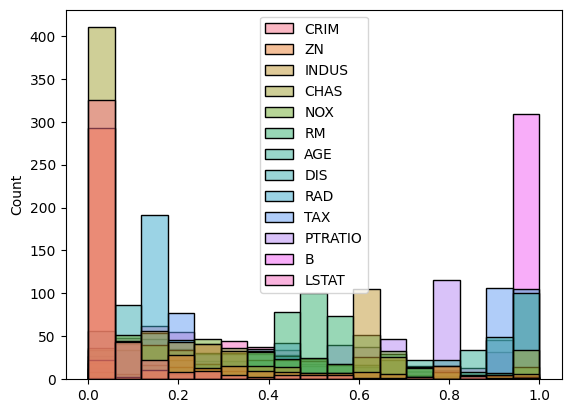

In [83]:
sns.histplot(X_train_escalado_df)
plt.show()

In [ ]:
#sabes cual es el iglu de la gentre negra? un nigglu...